## Image Classification on Fashion-MNIST with LeNet-5

From [https://github.com/zalandoresearch/fashion-mnist]:

---

Fashion-MNIST is a dataset of Zalando's article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.`

### Why we made Fashion-MNIST

The original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

### To Serious Machine Learning Researchers

Seriously, we are talking about replacing MNIST. Here are some good reasons:

- MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our [side-by-side benchmark for Fashion-MNIST vs. MNIST](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/), and read ["Most pairs of MNIST digits can be distinguished pretty well by just one pixel."](https://gist.github.com/dgrtwo/aaef94ecc6a60cd50322c0054cc04478)
- MNIST is overused. In [this April 2017 Twitter thread](https://twitter.com/goodfellow_ian/status/852591106655043584), Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
- MNIST can not represent modern CV tasks, as noted in [this April 2017 Twitter thread](https://twitter.com/fchollet/status/852594987527045120), deep learning expert/Keras author François Chollet.

---

In this notebook we will train an image classifier on the Fashion-MNIST data using the seminal [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) architecture.

In [1]:
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import keras.initializers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# load the data
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# confirm load
print('Training data has {} rows'.format(X_train.shape[0]))
print('Test data has {} rows'.format(X_test.shape[0]))

Training data has 60000 rows
Test data has 10000 rows


In [3]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

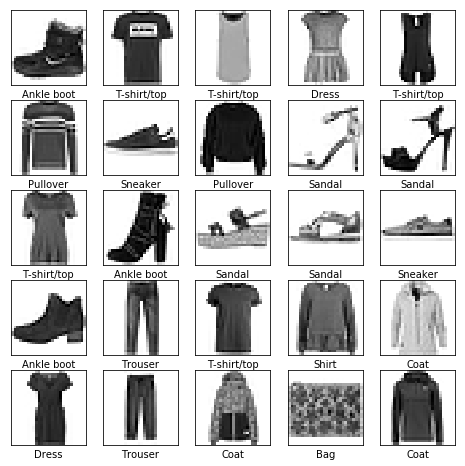

In [4]:
# class labels
class_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot the first 25 images in the training data
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_label[y_train[i]])

In [5]:
# reshape data to add colour channel
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')

# normalize data
X_train /= 255
X_test /= 255

# confirm data reshape
print('Training data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [6]:
# one-hot encode outputs
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# initialize parameters
input_shape = (img_rows, img_cols, 1)
batch_size = 32
lr = 1e-03
epochs = 15
opt = Adam(lr=lr, decay=lr / epochs)

# data augmentation
aug = ImageDataGenerator(rotation_range=10, 
                         width_shift_range=0.1,
                         height_shift_range=0.1, 
                         shear_range=0.1, 
                         zoom_range=0.1,
                         horizontal_flip=True, 
                         fill_mode="nearest")

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# LeNet-5 architecture with updated activation (ReLU) and optimizer (Adam)
model = Sequential()

# first layer CONV => ACTIVATION => POOL
model.add(Conv2D(20, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# second layer CONV => ACTIVATION => POOL
model.add(Conv2D(50, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# first FC layer
model.add(Flatten())          
model.add(Dense(500, activation='relu'))

# second FC layer with softmax classifier
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [8]:
# fit model using data augmentation
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs, 
    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5919 - acc: 0.7771 - val_loss: 0.3928 - val_acc: 0.8568
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4235 - acc: 0.8381 - val_loss: 0.3356 - val_acc: 0.8741
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3680 - acc: 0.8600 - val_loss: 0.3150 - val_acc: 0.8860
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3391 - acc: 0.8729 - val_loss: 0.2890 - val_acc: 0.8920
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3173 - acc: 0.8805 - val_loss: 0.3098 - val_acc: 0.8855
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3047 - acc: 0.8848 - val_loss: 0.2959 - val_acc: 0.8892
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2895 - acc: 0.8906 - val_loss: 0.2668 - val_acc: 0.9012
Epoch 8

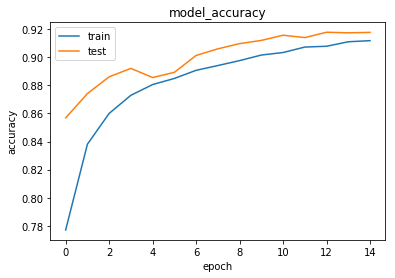

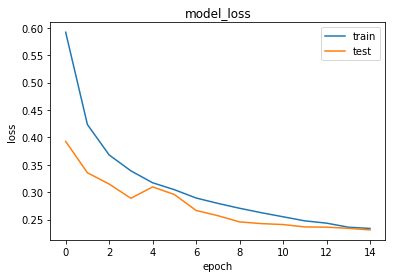

In [9]:
# plot model accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# plot model loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.show()

In [10]:
# print accuracy on test data
print("Accuracy on test data: {:.2f}%".format(H.history['val_acc'][epochs-1]*100))

Accuracy on test data: 91.76%
